In [32]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [10]:
Ne <- 500

In [3]:
asc_fact <- function(n, k) prod(rep(n, k) + ((1:k) - 1))

In [8]:
desc_fact <- function(n, k) prod(rep(n, k) - ((1:k) - 1))

In [40]:
g <- function(i, j, t) {
    t <- (t / 29 / (2 * Ne))
    sapply(seq(j, i), function(k) {
        exp(-k * (k - 1) * t / 2) *
        (2 * k - 1) * (-1) ^ (k - j) * asc_fact(j, k - 1) * desc_fact(i, k)  /
        (factorial(j) * (factorial(k - j) * asc_fact(i, k)))
    }) %>% sum
}

In [50]:
n <- 23
p <- 0.1

f <- function(n, p) {
    map_dbl(1:n, ~ g(n, .x, 10000) * dbinom(x = .x, size = n, prob = p)) %>% sum
}

In [55]:
admix_rate <- seq(0, 1, 0.025)

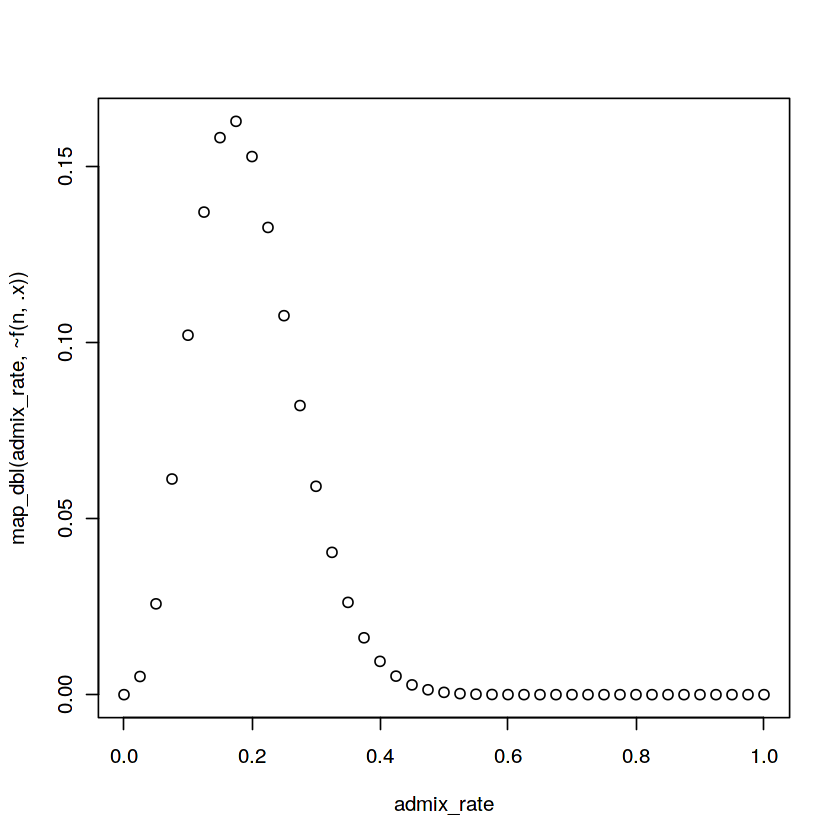

In [58]:
plot(admix_rate, map_dbl(admix_rate, ~ f(n, .x)))